## EXPORT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
import warnings
warnings.filterwarnings("ignore")

In [2]:
order_item_refunds = pd.read_csv(r'C:\Users\Asus\Desktop\python-workspace\Toy Store E-Commerce Database\order_item_refunds.csv')

print("Base Data :")
print(order_item_refunds.head().to_string(), "\n")
print("Info :")
print(order_item_refunds.info(), "\n")
duplicate = order_item_refunds[order_item_refunds.duplicated()]
print("Duplicate Rows :")
print(duplicate.to_string(), "\n")
print("Unique Count:")
def print_unique_count(df, columns):
    for col in columns:
        print(f"Unique count in {col}:", df[col].nunique())
print_unique_count(order_item_refunds, ['order_item_refund_id', 'created_at', 'order_item_id', 'order_id', 'refund_amount_usd'])

Base Data :
   order_item_refund_id           created_at  order_item_id  order_id  refund_amount_usd
0                     1  2012-04-06 11:32:43             57        57              49.99
1                     2  2012-04-13 01:09:43             74        74              49.99
2                     3  2012-04-15 07:03:48             71        71              49.99
3                     4  2012-04-17 20:00:37            118       118              49.99
4                     5  2012-04-22 20:53:49            116       116              49.99 

Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_item_refund_id  1731 non-null   int64  
 1   created_at            1731 non-null   object 
 2   order_item_id         1731 non-null   int64  
 3   order_id              1731 non-null   int64  
 4   refund_amount_usd     1731 n

In [3]:
print("""
NOTE:
order_item_refunds table:
1. Has 1731 rows
2. Doesn't have a NULL value
3. Doesn't have a duplicated rows
""")

print(order_item_refunds[order_item_refunds['order_id'].duplicated(keep=False)].sort_values('order_id').head(6).to_string(), "\n")
print("""NOTE :
There are 8 order_ids that have been refunded twice""", "\n")
print("Unique Value on refund_amount_usd column:", order_item_refunds['refund_amount_usd'].unique().tolist())


NOTE:
order_item_refunds table:
1. Has 1731 rows
2. Doesn't have a NULL value
3. Doesn't have a duplicated rows

      order_item_refund_id           created_at  order_item_id  order_id  refund_amount_usd
487                    488  2013-12-16 11:50:31           9407      9324              59.99
491                    492  2013-12-19 21:50:31           9406      9324              49.99
1045                  1046  2014-09-07 23:30:27          22767     19518              49.99
1104                  1105  2014-09-13 02:30:27          22768     19518              59.99
1123                  1124  2014-09-15 20:44:54          23227     19848              45.99
1179                  1180  2014-09-22 10:44:54          23226     19848              49.99 

NOTE :
There are 8 order_ids that have been refunded twice 

Unique Value on refund_amount_usd column: [49.99, 59.99, 45.99, 29.99]


In [4]:
order_items = pd.read_csv(r'C:\Users\Asus\Desktop\python-workspace\Toy Store E-Commerce Database\order_items.csv')

print("Base Data :")
print(order_items.head().to_string(), "\n")
print("Info :")
print(order_items.info(), "\n")
duplicate = order_items[order_items.duplicated()]
print("Duplicate Rows :")
print(duplicate.to_string(), "\n")
print("Count Unique :")
def print_unique_count(df, columns):
    for col in columns:
        print(f"Unique count in {col}:", df[col].nunique())
print_unique_count(order_items, ['order_item_id', 'created_at', 'order_id', 'product_id', 'is_primary_item', 'price_usd', 'cogs_usd'])

Base Data :
   order_item_id           created_at  order_id  product_id  is_primary_item  price_usd  cogs_usd
0              1  2012-03-19 10:42:46         1           1                1      49.99     19.49
1              2  2012-03-19 19:27:37         2           1                1      49.99     19.49
2              3  2012-03-20 06:44:45         3           1                1      49.99     19.49
3              4  2012-03-20 09:41:45         4           1                1      49.99     19.49
4              5  2012-03-20 11:28:15         5           1                1      49.99     19.49 

Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40025 entries, 0 to 40024
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_item_id    40025 non-null  int64  
 1   created_at       40025 non-null  object 
 2   order_id         40025 non-null  int64  
 3   product_id       40025 non-null  int64  
 4   is

In [5]:
print("""
NOTE:
order_items table:
1. Has 40025 rows
2. Doesn't have a NULL value
3. Doesn't have a duplicated rows
""")

print("Unique Value on product_id column:", order_items['product_id'].unique().tolist())
print("Unique Value on is_primary_item column:", order_items['is_primary_item'].unique().tolist())
print("Unique Value on price_usd column:", order_items['price_usd'].unique().tolist())
print("Unique Value on cogs_usd column:", order_items['cogs_usd'].unique().tolist(), "\n")

print(order_items[order_items['order_id'].duplicated(keep=False)].sort_values('order_id').head(6).to_string(), "\n")
avg_item_per_order = order_items.groupby("order_id")["order_item_id"].count().mean()
print(
    f"NOTE : Looking at the orders table, it can be concluded that one order can contain more than one item: {round(avg_item_per_order, 2)}", "items per order")


NOTE:
order_items table:
1. Has 40025 rows
2. Doesn't have a NULL value
3. Doesn't have a duplicated rows

Unique Value on product_id column: [1, 2, 3, 4]
Unique Value on is_primary_item column: [1, 0]
Unique Value on price_usd column: [49.99, 59.99, 45.99, 29.99]
Unique Value on cogs_usd column: [19.49, 22.49, 14.49, 9.49] 

      order_item_id           created_at  order_id  product_id  is_primary_item  price_usd  cogs_usd
7299           7300  2013-09-25 08:49:13      7300           1                1      49.99     19.49
7300           7301  2013-09-25 08:49:13      7300           2                0      59.99     22.49
7302           7303  2013-09-25 12:50:39      7302           1                1      49.99     19.49
7303           7304  2013-09-25 12:50:39      7302           2                0      59.99     22.49
7311           7312  2013-09-25 17:30:15      7310           1                1      49.99     19.49
7312           7313  2013-09-25 17:30:15      7310           2   

In [6]:
orders = pd.read_csv(r'C:\Users\Asus\Desktop\python-workspace\Toy Store E-Commerce Database\orders.csv')

print("Base Data :")
print(orders.head().to_string())
print("\n")
print("Info :")
print(orders.info(), "\n")
duplicate = orders[orders.duplicated()]
print("Duplicate Rows :")
print(duplicate.to_string(), "\n")
print("Count Unique :")
def print_unique_count(df, columns):
    for col in columns:
        print(f"Unique count in {col}:", df[col].nunique())
print_unique_count(orders, ['order_id', 'created_at', 'website_session_id', 'user_id', 'primary_product_id', 'items_purchased', 'price_usd', 'cogs_usd'])

Base Data :
   order_id           created_at  website_session_id  user_id  primary_product_id  items_purchased  price_usd  cogs_usd
0         1  2012-03-19 10:42:46                  20       20                   1                1      49.99     19.49
1         2  2012-03-19 19:27:37                 104      104                   1                1      49.99     19.49
2         3  2012-03-20 06:44:45                 147      147                   1                1      49.99     19.49
3         4  2012-03-20 09:41:45                 160      160                   1                1      49.99     19.49
4         5  2012-03-20 11:28:15                 177      177                   1                1      49.99     19.49


Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32313 entries, 0 to 32312
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            32313 non-null  int64  
 1  

In [7]:
print("""
NOTE:
orders table:
1. Has 32313 rows
2. Doesn't have a NULL value
3. Doesn't have a duplicated rows
""")

print("Unique Value on primary_product_id column:", orders['primary_product_id'].unique().tolist())
print("Unique Value on items_purchased column:", orders['items_purchased'].unique().tolist())
print("Unique Value on price_usd column:", orders['price_usd'].unique().tolist())
print("Unique Value on cogs_usd column:", orders['cogs_usd'].unique().tolist(), "\n")

print(orders[orders['user_id'].duplicated(keep=False)].sort_values('user_id').head(6).to_string(), "\n")
avg_order_per_user = orders.groupby("user_id")["order_id"].count().mean()
print(
    f"NOTE : There are several users (customers) who place orders more than once: {round(avg_order_per_user, 2)}", "orders per user")


NOTE:
orders table:
1. Has 32313 rows
2. Doesn't have a NULL value
3. Doesn't have a duplicated rows

Unique Value on primary_product_id column: [1, 2, 3, 4]
Unique Value on items_purchased column: [1, 2]
Unique Value on price_usd column: [49.99, 59.99, 109.98, 95.98, 45.99, 105.98, 89.98, 79.98, 75.98, 29.99]
Unique Value on cogs_usd column: [19.49, 22.49, 41.98, 33.98, 14.49, 36.98, 31.98, 28.98, 23.98, 9.49] 

     order_id           created_at  website_session_id  user_id  primary_product_id  items_purchased  price_usd  cogs_usd
386       387  2012-06-26 21:13:49               12760     3561                   1                1      49.99     19.49
316       317  2012-06-11 18:56:38               10674     3561                   1                1      49.99     19.49
354       355  2012-06-19 20:11:05               11835    11071                   1                1      49.99     19.49
499       500  2012-07-19 17:43:50               15845    11071                   1           

In [8]:
products = pd.read_csv(r'C:\Users\Asus\Desktop\python-workspace\Toy Store E-Commerce Database\products.csv')

print("Base Data :")
print(products.head().to_string())
print("\n")
print("Info :")
print(products.info(), "\n")
duplicate = products[products.duplicated()]
print("Duplicate Rows :")
print(duplicate.to_string())
# print("\n")
# print("Count Unique :")
# def print_unique_count(df, columns):
#     for col in columns:
#         print(f"Unique count in {col}:", df[col].nunique())
# print_unique_count(orders, ['order_id', 'created_at', 'website_session_id', 'user_id', 'primary_product_id', 'items_purchased', 'price_usd', 'cogs_usd'])

Base Data :
   product_id           created_at                product_name
0           1  2012-03-19 08:00:00      The Original Mr. Fuzzy
1           2  2013-01-06 13:00:00       The Forever Love Bear
2           3  2013-12-12 09:00:00    The Birthday Sugar Panda
3           4  2014-02-05 10:00:00  The Hudson River Mini bear


Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    4 non-null      int64 
 1   created_at    4 non-null      object
 2   product_name  4 non-null      object
dtypes: int64(1), object(2)
memory usage: 228.0+ bytes
None 

Duplicate Rows :
Empty DataFrame
Columns: [product_id, created_at, product_name]
Index: []


In [9]:
print("""
NOTE:
products table:
1. Has 4 rows
2. Doesn't have a NULL value
3. Doesn't have a duplicated rows
""")


NOTE:
products table:
1. Has 4 rows
2. Doesn't have a NULL value
3. Doesn't have a duplicated rows



In [10]:
website_pageviews = pd.read_csv(r'C:\Users\Asus\Desktop\python-workspace\Toy Store E-Commerce Database\website_pageviews.csv')

print("Base Data :")
print(website_pageviews.head().to_string())
print("\n")
print("Info :")
print(website_pageviews.info(), "\n")
duplicate = website_pageviews[website_pageviews.duplicated()]
print("Duplicate Rows :")
print(duplicate.to_string(), "\n")
print("Count Unique :")
def print_unique_count(df, columns):
    for col in columns:
        print(f"Unique count in {col}:", df[col].nunique())
print_unique_count(website_pageviews, ['website_pageview_id', 'created_at', 'website_session_id', 'pageview_url'])

Base Data :
   website_pageview_id           created_at  website_session_id pageview_url
0                    1  2012-03-19 08:04:16                   1        /home
1                    2  2012-03-19 08:16:49                   2        /home
2                    3  2012-03-19 08:26:55                   3        /home
3                    4  2012-03-19 08:37:33                   4        /home
4                    5  2012-03-19 09:00:55                   5        /home


Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188124 entries, 0 to 1188123
Data columns (total 4 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   website_pageview_id  1188124 non-null  int64 
 1   created_at           1188124 non-null  object
 2   website_session_id   1188124 non-null  int64 
 3   pageview_url         1188124 non-null  object
dtypes: int64(2), object(2)
memory usage: 36.3+ MB
None 

Duplicate Rows :
Empty DataFrame
Columns:

In [11]:
print("""
NOTE:
website_pageviews table:
1. Has 1188124 rows
2. Doesn't have a NULL value
3. Doesn't have a duplicated rows
""")

print("Unique Value on pageview_url column:", website_pageviews['pageview_url'].unique().tolist(), "\n")

print(website_pageviews[website_pageviews['website_session_id'].duplicated(keep=False)].sort_values('website_session_id').head(6).to_string(), "\n")
avg_pageview_per_session = website_pageviews.groupby("website_session_id")["website_pageview_id"].count().mean()
print(
    f"NOTE : The average user visits the website once to view: {round(avg_pageview_per_session, 2)}", "pageviews per session")


NOTE:
website_pageviews table:
1. Has 1188124 rows
2. Doesn't have a NULL value
3. Doesn't have a duplicated rows

Unique Value on pageview_url column: ['/home', '/products', '/the-original-mr-fuzzy', '/cart', '/shipping', '/billing', '/thank-you-for-your-order', '/lander-1', '/billing-2', '/the-forever-love-bear', '/lander-2', '/lander-3', '/the-birthday-sugar-panda', '/lander-4', '/lander-5', '/the-hudson-river-mini-bear'] 

    website_pageview_id           created_at  website_session_id            pageview_url
5                     6  2012-03-19 09:05:46                   6                   /home
9                    10  2012-03-19 09:14:02                   6                   /cart
8                     9  2012-03-19 09:10:52                   6  /the-original-mr-fuzzy
7                     8  2012-03-19 09:10:08                   6               /products
10                   11  2012-03-19 09:16:52                   6               /shipping
12                   13  2012-03-1

In [12]:
website_sessions = pd.read_csv(r'C:\Users\Asus\Desktop\python-workspace\Toy Store E-Commerce Database\website_sessions.csv')

print("Base Data :")
print(website_sessions.head().to_string())
print("\n")
print("Info :")
print(website_sessions.info(), "\n")
duplicate = website_sessions[website_sessions.duplicated()]
print("Duplicate Rows :")
print(duplicate.to_string(), "\n")
print("Count Unique :")
def print_unique_count(df, columns):
    for col in columns:
        print(f"Unique count in {col}:", df[col].nunique())
print_unique_count(website_sessions, ['website_session_id', 'created_at', 'user_id', 'is_repeat_session', 'utm_source', 'utm_campaign', 'utm_content', 'device_type', 'http_referer'])

Base Data :
   website_session_id           created_at  user_id  is_repeat_session utm_source utm_campaign utm_content device_type             http_referer
0                   1  2012-03-19 08:04:16        1                  0    gsearch     nonbrand      g_ad_1      mobile  https://www.gsearch.com
1                   2  2012-03-19 08:16:49        2                  0    gsearch     nonbrand      g_ad_1     desktop  https://www.gsearch.com
2                   3  2012-03-19 08:26:55        3                  0    gsearch     nonbrand      g_ad_1     desktop  https://www.gsearch.com
3                   4  2012-03-19 08:37:33        4                  0    gsearch     nonbrand      g_ad_1     desktop  https://www.gsearch.com
4                   5  2012-03-19 09:00:55        5                  0    gsearch     nonbrand      g_ad_1      mobile  https://www.gsearch.com


Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472871 entries, 0 to 472870
Data columns (total 9 columns):
 #   

In [13]:
print("""
NOTE:
website_sessions table:
1. Has 472871 rows
2. Does have a NULL value on utm_source, utm_campaign, utm_content, http_referer column
3. Doesn't have a duplicated rows
""")

print("NULL values in each columns:")
print(website_sessions.isnull().sum(), "\n")

print("Unique Value on is_repeat_session column:", website_sessions['is_repeat_session'].unique().tolist())
print("Unique Value on utm_source column:", website_sessions['utm_source'].unique().tolist())
print("Unique Value on utm_campaign column:", website_sessions['utm_campaign'].unique().tolist())
print("Unique Value on utm_content column:", website_sessions['utm_content'].unique().tolist())
print("Unique Value on device_type column:", website_sessions['device_type'].unique().tolist())
print("Unique Value on http_referer column:", website_sessions['http_referer'].unique().tolist(), "\n")

print(website_sessions[website_sessions['user_id'].duplicated(keep=False)].sort_values('user_id').head(6).to_string(), "\n")
print("NOTE : " \
"Total user_id who visited the website more than once:", website_sessions[website_sessions["is_repeat_session"] == 1]["user_id"].nunique(), "users")


NOTE:
website_sessions table:
1. Has 472871 rows
2. Does have a NULL value on utm_source, utm_campaign, utm_content, http_referer column
3. Doesn't have a duplicated rows

NULL values in each columns:
website_session_id        0
created_at                0
user_id                   0
is_repeat_session         0
utm_source            83328
utm_campaign          83328
utm_content           83328
device_type               0
http_referer          39917
dtype: int64 

Unique Value on is_repeat_session column: [0, 1]
Unique Value on utm_source column: ['gsearch', nan, 'bsearch', 'socialbook']
Unique Value on utm_campaign column: ['nonbrand', nan, 'brand', 'pilot', 'desktop_targeted']
Unique Value on utm_content column: ['g_ad_1', nan, 'g_ad_2', 'b_ad_2', 'b_ad_1', 'social_ad_1', 'social_ad_2']
Unique Value on device_type column: ['mobile', 'desktop']
Unique Value on http_referer column: ['https://www.gsearch.com', nan, 'https://www.bsearch.com', 'https://www.socialbook.com'] 

      website

In [14]:
print("""
CONCLUSION:
1. order_item_refunds: There are 8 order_ids that have been refunded twice
2. order_items: Looking at the orders table, it can be concluded that one order can contain more than one item: 1.24 items per order
3. orders: There are several users (customers) who place orders more than once: 1.02 orders per user
4. products: NONE
5. website_pageviews: The average user visits the website once to view: 2.51 pageviews per session
6. website_sessions: Total user_id who visited the website more than once: 51270 users
""")


CONCLUSION:
1. order_item_refunds: There are 8 order_ids that have been refunded twice
2. order_items: Looking at the orders table, it can be concluded that one order can contain more than one item: 1.24 items per order
3. orders: There are several users (customers) who place orders more than once: 1.02 orders per user
4. products: NONE
5. website_pageviews: The average user visits the website once to view: 2.51 pageviews per session
6. website_sessions: Total user_id who visited the website more than once: 51270 users



## TRANSFORM

In [15]:
print("""
NOTE:
order_item_refunds table:
1. order_item_refund_id --> int64 to string
2. created_at --> object to timestamp
3. order_item_id --> int64 to string
4. order_id --> int64 to string
""")

order_item_refunds["order_item_refund_id"] = order_item_refunds["order_item_refund_id"].astype("string")
order_item_refunds["created_at"] = pd.to_datetime(order_item_refunds["created_at"])
order_item_refunds["order_item_id"] = order_item_refunds["order_item_id"].astype("string")
order_item_refunds["order_id"] = order_item_refunds["order_id"].astype("string")

order_item_refunds.info()


NOTE:
order_item_refunds table:
1. order_item_refund_id --> int64 to string
2. created_at --> object to timestamp
3. order_item_id --> int64 to string
4. order_id --> int64 to string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_item_refund_id  1731 non-null   string        
 1   created_at            1731 non-null   datetime64[ns]
 2   order_item_id         1731 non-null   string        
 3   order_id              1731 non-null   string        
 4   refund_amount_usd     1731 non-null   float64       
dtypes: datetime64[ns](1), float64(1), string(3)
memory usage: 67.7 KB


In [16]:
print("""
NOTE:
order_items table:
1. order_item_id --> int64 to string
2. created_at --> object to timestamp
3. order_id --> int64 to string
4. product_id --> int64 to string
5. is_primary_item --> int64 to boolean (YES/NO)
""")

order_items["order_item_id"] = order_items["order_item_id"].astype("string")
order_items["created_at"] = pd.to_datetime(order_items["created_at"])
order_items["order_id"] = order_items["order_id"].astype("string")
order_items["product_id"] = order_items["product_id"].astype("string")
order_items["is_primary_item"] = order_items["is_primary_item"].map({0: "NO", 1: "YES"})

print(order_items.info(), "\n")
print("Unique Value on is_primary_item column:", order_items['is_primary_item'].unique().tolist())


NOTE:
order_items table:
1. order_item_id --> int64 to string
2. created_at --> object to timestamp
3. order_id --> int64 to string
4. product_id --> int64 to string
5. is_primary_item --> int64 to boolean (YES/NO)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40025 entries, 0 to 40024
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_item_id    40025 non-null  string        
 1   created_at       40025 non-null  datetime64[ns]
 2   order_id         40025 non-null  string        
 3   product_id       40025 non-null  string        
 4   is_primary_item  40025 non-null  object        
 5   price_usd        40025 non-null  float64       
 6   cogs_usd         40025 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1), string(3)
memory usage: 2.1+ MB
None 

Unique Value on is_primary_item column: ['YES', 'NO']


In [17]:
print("""
NOTE:
orders table:
1. order_id --> int64 to string
2. created_at --> object to timestamp
3. website_session_id --> int64 to string
4. user_id --> int64 to string
5. primary_product_id --> int64 to string
""")

orders["order_id"] = orders["order_id"].astype("string")
orders["created_at"] = pd.to_datetime(orders["created_at"])
orders["website_session_id"] = orders["website_session_id"].astype("string")
orders["user_id"] = orders["user_id"].astype("string")
orders["primary_product_id"] = orders["primary_product_id"].astype("string")

print(orders.info())


NOTE:
orders table:
1. order_id --> int64 to string
2. created_at --> object to timestamp
3. website_session_id --> int64 to string
4. user_id --> int64 to string
5. primary_product_id --> int64 to string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32313 entries, 0 to 32312
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            32313 non-null  string        
 1   created_at          32313 non-null  datetime64[ns]
 2   website_session_id  32313 non-null  string        
 3   user_id             32313 non-null  string        
 4   primary_product_id  32313 non-null  string        
 5   items_purchased     32313 non-null  int64         
 6   price_usd           32313 non-null  float64       
 7   cogs_usd            32313 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 2.0 MB
None


In [18]:
print("""
NOTE:
products table:
1. product_id --> int64 to string
2. created_at --> object to timestamp
""")

products["product_id"] = products["product_id"].astype("string")
products["created_at"] = pd.to_datetime(products["created_at"])

print(products.info())


NOTE:
products table:
1. product_id --> int64 to string
2. created_at --> object to timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   product_id    4 non-null      string        
 1   created_at    4 non-null      datetime64[ns]
 2   product_name  4 non-null      object        
dtypes: datetime64[ns](1), object(1), string(1)
memory usage: 228.0+ bytes
None


In [19]:
print("""
NOTE:
website_pageviews table:
1. website_pageview_id --> int64 to string
2. created_at --> object to timestamp
3. website_session_id --> int64 to string
""")

website_pageviews["website_pageview_id"] = website_pageviews["website_pageview_id"].astype("string")
website_pageviews["created_at"] = pd.to_datetime(website_pageviews["created_at"])
website_pageviews["website_session_id"] = website_pageviews["website_session_id"].astype("string")

print(website_pageviews.info())


NOTE:
website_pageviews table:
1. website_pageview_id --> int64 to string
2. created_at --> object to timestamp
3. website_session_id --> int64 to string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188124 entries, 0 to 1188123
Data columns (total 4 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   website_pageview_id  1188124 non-null  string        
 1   created_at           1188124 non-null  datetime64[ns]
 2   website_session_id   1188124 non-null  string        
 3   pageview_url         1188124 non-null  object        
dtypes: datetime64[ns](1), object(1), string(2)
memory usage: 36.3+ MB
None


In [20]:
all_null = (
    website_sessions['utm_source'].isna() &
    website_sessions['utm_campaign'].isna() &
    website_sessions['utm_content'].isna()
)

any_null = (
    website_sessions['utm_source'].isna() |
    website_sessions['utm_campaign'].isna() |
    website_sessions['utm_content'].isna()
)

total_any_null = any_null.sum()

yes_count = all_null.sum()
no_count = total_any_null - yes_count
yes_percent = (yes_count / total_any_null) * 100 if total_any_null > 0 else 0
no_percent = (no_count / total_any_null) * 100 if total_any_null > 0 else 0

print(f"YES (NULL on the same line): {yes_percent:.2f}%")
print(f"NO (NULL isn't always on the same line): {no_percent:.2f}%")

YES (NULL on the same line): 100.00%
NO (NULL isn't always on the same line): 0.00%


In [21]:
result = (
    website_sessions
    .groupby(['utm_source', 'utm_content', 'utm_campaign'])
    .agg(
        http_referer_unique=('http_referer', 'unique'),
        device_type_unique=('device_type', 'unique'),
        has_repeat_session=('is_repeat_session', 'max')
    )
    .reset_index()
)

print(result.to_string())

   utm_source  utm_content      utm_campaign           http_referer_unique device_type_unique  has_repeat_session
0     bsearch       b_ad_1          nonbrand     [https://www.bsearch.com]  [desktop, mobile]                   0
1     bsearch       b_ad_2             brand     [https://www.bsearch.com]  [desktop, mobile]                   1
2     gsearch       g_ad_1          nonbrand     [https://www.gsearch.com]  [mobile, desktop]                   0
3     gsearch       g_ad_2             brand     [https://www.gsearch.com]  [desktop, mobile]                   1
4  socialbook  social_ad_1             pilot  [https://www.socialbook.com]  [mobile, desktop]                   0
5  socialbook  social_ad_2  desktop_targeted  [https://www.socialbook.com]          [desktop]                   0


In [22]:
rules = [
    ('gsearch', 'g_ad_1', 'nonbrand', 0),
    ('gsearch', 'g_ad_2', 'brand', 1),
    ('bsearch', 'b_ad_1', 'nonbrand', 0),
    ('bsearch', 'b_ad_2', 'brand', 1),
    ('socialbook', 'social_ad_1', 'pilot', 0),
    ('socialbook', 'social_ad_2', 'desktop_targeted', 0),
]

results = []

for source, content, exp_campaign, exp_repeat in rules:
    subset = website_sessions[
        (website_sessions['utm_source'] == source) &
        (website_sessions['utm_content'] == content)
    ]

    campaign_values = subset['utm_campaign'].dropna().unique()
    campaign_ok = (
        len(campaign_values) == 1 and campaign_values[0] == exp_campaign
    )

    repeat_values = subset['is_repeat_session'].dropna().unique()
    repeat_ok = (
        len(repeat_values) == 1 and repeat_values[0] == exp_repeat
    )

    results.append({
        'utm_source': source,
        'utm_content': content,
        'expected_utm_campaign': exp_campaign,
        'actual_utm_campaigns': list(campaign_values),
        'utm_campaign_OK': 'YES' if campaign_ok else 'NO',
        'expected_is_repeat_session': exp_repeat,
        'actual_is_repeat_session': list(repeat_values),
        'is_repeat_session_OK': 'YES' if repeat_ok else 'NO'
    })

result_df = pd.DataFrame(results)
print(result_df.to_string(index=False))

utm_source utm_content expected_utm_campaign actual_utm_campaigns utm_campaign_OK  expected_is_repeat_session actual_is_repeat_session is_repeat_session_OK
   gsearch      g_ad_1              nonbrand           [nonbrand]             YES                           0                      [0]                  YES
   gsearch      g_ad_2                 brand              [brand]             YES                           1                   [1, 0]                   NO
   bsearch      b_ad_1              nonbrand           [nonbrand]             YES                           0                      [0]                  YES
   bsearch      b_ad_2                 brand              [brand]             YES                           1                   [0, 1]                   NO
socialbook social_ad_1                 pilot              [pilot]             YES                           0                      [0]                  YES
socialbook social_ad_2      desktop_targeted   [desktop_targeted

In [23]:
print("""
utm_source handling NULL values:
1. If http_referer includes 'gsearch', then the value in the utm_source column = 'gsearch'
2. If http_referer includes 'bsearch', then the value in the utm_source column = 'bsearch'
3. If http_referer includes 'socialbook', then the value in the utm_source column = 'socialbook'
      
utm_content handling NULL values:
1. If utm_source = 'gsearch' & is_repeat_session only has a value of 0, then fill in the value in the utm_content column = 'g_ad_1', ELSE 'g_ad_2'
2. If utm_source = 'bsearch' & is_repeat_session only has a value of 0, then fill in the value in the utm_content column = 'b_ad_1', ELSE 'b_ad_2'
3. If utm_source = 'socialbook' & device_type = 'desktop', then fill in the value in the utm_content column = 'social_ad_2', ELSE 'social_ad_1'
      
utm_campaign handling NULL values:
1. If utm_source = 'gsearch' & utm_content = 'g_ad_1', then fill in the value in the utm_campaign column = 'nonbrand', ELSE 'brand'
2. If utm_source = 'bsearch' & utm_content = 'b_ad_1', then fill in the value in the utm_campaign column = 'nonbrand', ELSE 'brand'
3. If utm_source = 'socialbook' & utm_content = 'social_ad_1', then fill in the value in the utm_campaign column = 'pilot', ELSE 'desktop_targeted'
""")


utm_source handling NULL values:
1. If http_referer includes 'gsearch', then the value in the utm_source column = 'gsearch'
2. If http_referer includes 'bsearch', then the value in the utm_source column = 'bsearch'
3. If http_referer includes 'socialbook', then the value in the utm_source column = 'socialbook'

utm_content handling NULL values:
1. If utm_source = 'gsearch' & is_repeat_session only has a value of 0, then fill in the value in the utm_content column = 'g_ad_1', ELSE 'g_ad_2'
2. If utm_source = 'bsearch' & is_repeat_session only has a value of 0, then fill in the value in the utm_content column = 'b_ad_1', ELSE 'b_ad_2'
3. If utm_source = 'socialbook' & device_type = 'desktop', then fill in the value in the utm_content column = 'social_ad_2', ELSE 'social_ad_1'

utm_campaign handling NULL values:
1. If utm_source = 'gsearch' & utm_content = 'g_ad_1', then fill in the value in the utm_campaign column = 'nonbrand', ELSE 'brand'
2. If utm_source = 'bsearch' & utm_content = '

In [24]:
SOURCE_FROM_REFERER = {
    'gsearch': 'gsearch',
    'bsearch': 'bsearch',
    'socialbook': 'socialbook'
}

def fill_utm_source(row):
    if pd.notna(row['utm_source']):
        return row['utm_source']

    referer = str(row['http_referer'])

    for key, value in SOURCE_FROM_REFERER.items():
        if key in referer:
            return value

    return row['utm_source']

In [ ]:
CONTENT_RULES = {
    'gsearch': {
        'repeat_0': 'g_ad_1',
        'else': 'g_ad_2'
    },
    'bsearch': {
        'repeat_0': 'b_ad_1',
        'else': 'b_ad_2'
    },
    'socialbook': {
        'desktop': 'social_ad_2',
        'else': 'social_ad_1'
    }
}

repeat_flags = (
    website_sessions
    .groupby('utm_source')['is_repeat_session']
    .nunique()
    .to_dict()
)

def fill_utm_content(row):
    if pd.notna(row['utm_content']):
        return row['utm_content']

    source = row['utm_source']

    if source in ['gsearch', 'bsearch']:
        if repeat_flags.get(source) == 1:
            return CONTENT_RULES[source]['repeat_0']
        elif repeat_flags.get(source) > 1:
            return CONTENT_RULES[source]['else']
        else:
            return None

    if source == 'socialbook':
        if row['device_type'] == 'desktop':
            return CONTENT_RULES[source]['desktop']
        return CONTENT_RULES[source]['else']

    return None

In [26]:
CAMPAIGN_RULES = {
    'gsearch': {
        'g_ad_1': 'nonbrand',
        'else': 'brand'
    },
    'bsearch': {
        'b_ad_1': 'nonbrand',
        'else': 'brand'
    },
    'socialbook': {
        'social_ad_1': 'pilot',
        'else': 'desktop_targeted'
    }
}

def fill_utm_campaign(row):
    if pd.notna(row['utm_campaign']):
        return row['utm_campaign']

    if pd.isna(row['utm_source']) or pd.isna(row['utm_content']):
        return row['utm_campaign']

    source = row['utm_source']
    content = row['utm_content']

    if source in CAMPAIGN_RULES:
        return CAMPAIGN_RULES[source].get(
    content,
            CAMPAIGN_RULES[source]['else']
        )

    return row['utm_campaign']

In [27]:
website_sessions['utm_source'] = website_sessions.apply(fill_utm_source, axis=1)
website_sessions['utm_content'] = website_sessions.apply(fill_utm_content, axis=1)
website_sessions['utm_campaign'] = website_sessions.apply(fill_utm_campaign, axis=1)

In [28]:
print("""
NOTE:
website_sessions table:
1. website_session_id --> int64 to string
2. created_at --> object to timestamp
3. user_id --> int64 to string
4. is_repeat_session --> int64 to boolean (YES/NO)
5. Handling NULL values in utm_source, utm_campaign, utm_content, http_referer --> fill 'Other'
""")

website_sessions["website_session_id"] = website_sessions["website_session_id"].astype("string")
website_sessions["created_at"] = pd.to_datetime(website_sessions["created_at"])
website_sessions["user_id"] = website_sessions["user_id"].astype("string")
website_sessions["is_repeat_session"] = website_sessions["is_repeat_session"].map({0: "NO", 1: "YES"})

cols = ["utm_source", "utm_campaign", "utm_content", "http_referer"]
website_sessions[cols] = website_sessions[cols].fillna("unknown")

print(website_sessions.info(), "\n")
print("Unique Value on is_repeat_session column:", website_sessions['is_repeat_session'].unique().tolist())


NOTE:
website_sessions table:
1. website_session_id --> int64 to string
2. created_at --> object to timestamp
3. user_id --> int64 to string
4. is_repeat_session --> int64 to boolean (YES/NO)
5. Handling NULL values in utm_source, utm_campaign, utm_content, http_referer --> fill 'Other'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472871 entries, 0 to 472870
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   website_session_id  472871 non-null  string        
 1   created_at          472871 non-null  datetime64[ns]
 2   user_id             472871 non-null  string        
 3   is_repeat_session   472871 non-null  object        
 4   utm_source          472871 non-null  object        
 5   utm_campaign        472871 non-null  object        
 6   utm_content         472871 non-null  object        
 7   device_type         472871 non-null  object        
 8   http_referer        47287

## LOAD

In [29]:
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus

In [30]:
TABLE_SCHEMAS = {

    "order_item_refunds": """
        CREATE TABLE IF NOT EXISTS order_item_refunds (
            order_item_refund_id INT PRIMARY KEY,
            created_at DATETIME NOT NULL,
            order_item_id INT NOT NULL,
            order_id INT NOT NULL,
            refund_amount_usd DECIMAL(10,2) NOT NULL
        ) ENGINE=InnoDB;
    """,

    "order_items": """
        CREATE TABLE IF NOT EXISTS order_items (
            order_item_id INT PRIMARY KEY,
            created_at DATETIME NOT NULL,
            order_id INT NOT NULL,
            product_id INT NOT NULL,
            is_primary_item VARCHAR(10) NOT NULL,
            price_usd DECIMAL(10,2) NOT NULL,
            cogs_usd DECIMAL(10,2) NOT NULL
        ) ENGINE=InnoDB;
    """,

    "orders": """
        CREATE TABLE IF NOT EXISTS orders (
            order_id INT PRIMARY KEY,
            created_at DATETIME NOT NULL,
            website_session_id INT NOT NULL,
            user_id INT NOT NULL,
            primary_product_id INT NOT NULL,
            items_purchased INT NOT NULL,
            price_usd DECIMAL(10,2) NOT NULL,
            cogs_usd DECIMAL(10,2) NOT NULL
        ) ENGINE=InnoDB;
    """,

    "products": """
        CREATE TABLE IF NOT EXISTS products (
            product_id INT PRIMARY KEY,
            created_at DATETIME NOT NULL,
            product_name VARCHAR(50) NOT NULL
        ) ENGINE=InnoDB;
    """,

    "website_pageviews": """
        CREATE TABLE IF NOT EXISTS website_pageviews (
            website_pageview_id INT PRIMARY KEY,
            created_at DATETIME NOT NULL,
            website_session_id INT NOT NULL,
            pageview_url VARCHAR(50) NOT NULL
        ) ENGINE=InnoDB;
    """,

    "website_sessions": """
        CREATE TABLE IF NOT EXISTS website_sessions (
            website_session_id INT PRIMARY KEY,
            created_at DATETIME NOT NULL,
            user_id INT NOT NULL,
            is_repeat_session VARCHAR(10) NOT NULL,
            utm_source VARCHAR(50) NOT NULL,
            utm_campaign VARCHAR(50) NOT NULL,
            utm_content VARCHAR(50) NOT NULL,
            device_type VARCHAR(10) NOT NULL,
            http_referer VARCHAR(50) NOT NULL
        ) ENGINE=InnoDB;
    """
}

In [31]:
username = "root"
password = "@Nauraraniyah23"
host = "localhost"
port = 3306
database = "toy_store"

encoded_password = quote_plus(password)
engine = create_engine(
    f"mysql+pymysql://{username}:{encoded_password}@{host}:{port}/"
)

In [32]:
with engine.connect() as conn:
    conn.execute(text("CREATE DATABASE IF NOT EXISTS toy_store"))
    print("✅ Database 'toy_store' berhasil dibuat!")

✅ Database 'toy_store' berhasil dibuat!


In [33]:
engine = create_engine(
    f"mysql+pymysql://{username}:{encoded_password}@{host}:{port}/{database}"
)
with engine.connect() as conn:
    print("✅ Koneksi ke database 'toy_store' berhasil!")

✅ Koneksi ke database 'toy_store' berhasil!


In [34]:
with engine.connect() as conn:
    for table_name, create_sql in TABLE_SCHEMAS.items():
        conn.execute(text(create_sql))
    print("✅ Semua tabel berhasil dibuat!")

✅ Semua tabel berhasil dibuat!


In [35]:
dataframes = {
    "order_item_refunds": order_item_refunds,
    "order_items": order_items,
    "orders": orders,
    "products": products,
    "website_pageviews": website_pageviews,
    "website_sessions": website_sessions,
}

for table_name, df in dataframes.items():
    df.to_sql(
        name=table_name,
        con=engine,
        if_exists="append",
        index=False
    )

print("✅ Semua data berhasil diupload ke MySQL!")

✅ Semua data berhasil diupload ke MySQL!


In [36]:
print("""
NOTE:
Successfully created the database and loaded the table into the database
""")


NOTE:
Successfully created the database and loaded the table into the database



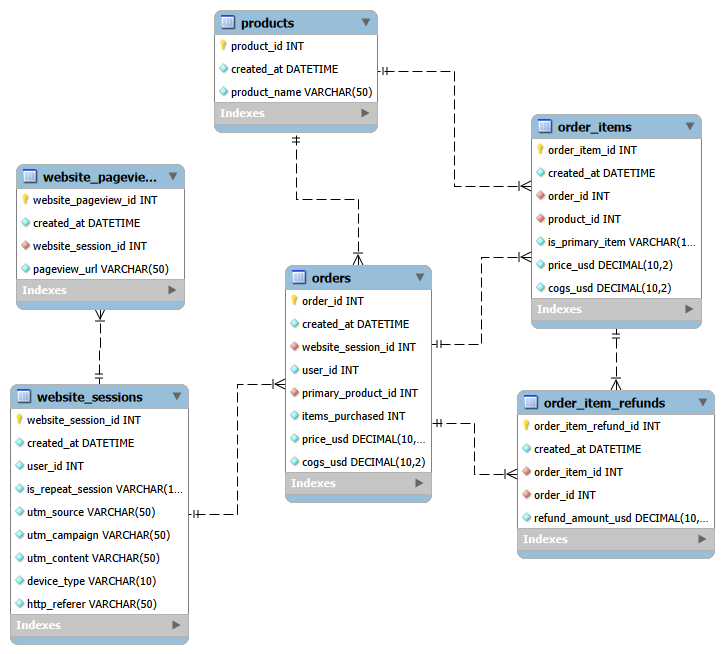

In [37]:
from IPython.display import Image
Image(filename=r'C:\Users\Asus\Desktop\python-workspace\Toy Store E-Commerce Database\ERD Toy Store.png')

In [38]:
conn.close()

## ANALYSIS

In [39]:
print("""
Toy Store E-Commerce Database
      
E-Commerce database for Maven Fuzzy Factory, an online retailer that sells teddy bears. It includes detailed marketing data on website sessions 
and pageviews by user, as well as their orders and returns. Perfect for analyzing and optimizing marketing channels, measuring and testing website 
conversion performance, and understanding the impact of new product launches

Recommended Analysis
1. What is the trend in website sessions and order volume?
2. What is the session-to-order conversion rate? How has it trended?
3. Which marketing channels have been most successful?
4. How has the revenue per order evolved? What about revenue per session?"
""")


Toy Store E-Commerce Database

E-Commerce database for Maven Fuzzy Factory, an online retailer that sells teddy bears. It includes detailed marketing data on website sessions 
and pageviews by user, as well as their orders and returns. Perfect for analyzing and optimizing marketing channels, measuring and testing website 
conversion performance, and understanding the impact of new product launches

Recommended Analysis
1. What is the trend in website sessions and order volume?
2. What is the session-to-order conversion rate? How has it trended?
3. Which marketing channels have been most successful?
4. How has the revenue per order evolved? What about revenue per session?"



In [40]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="@Nauraraniyah23",
    database="toy_store"
)

In [41]:
question_1_2 = """
WITH quarter_data AS (
    SELECT
        DATE_FORMAT(ws.created_at, '%Y-%m') AS year_month_date,
        COUNT(DISTINCT ws.website_session_id) AS sessions,
        COUNT(DISTINCT o.order_id) AS orders
    FROM toy_store.website_sessions ws
    LEFT JOIN toy_store.orders o ON ws.website_session_id = o.website_session_id
    GROUP BY 1
),
lag_sessions AS (
    SELECT
        year_month_date,
        sessions,
        orders,
        LAG(sessions) OVER (ORDER BY year_month_date) AS prev_sessions,
        LAG(orders) OVER (ORDER BY year_month_date) AS prev_orders
    FROM quarter_data
),
min_max AS (
    SELECT
        MIN(sessions) AS min_sessions,
        MAX(sessions) AS max_sessions,
        MIN(orders) AS min_orders,
        MAX(orders) AS max_orders
    FROM quarter_data
)
SELECT
    l.year_month_date,
    l.sessions,
    CASE 
        WHEN l.prev_sessions IS NULL THEN 'N/A'
        WHEN l.sessions > l.prev_sessions THEN 'UP'
        WHEN l.sessions < l.prev_sessions THEN 'DOWN'
        ELSE 'FLAT'
    END AS sessions_trend,
    l.orders,
    CASE 
        WHEN l.prev_orders IS NULL THEN 'N/A'
        WHEN l.orders > l.prev_orders THEN 'UP'
        WHEN l.orders < l.prev_orders THEN 'DOWN'
        ELSE 'FLAT'
    END AS orders_trend
FROM lag_sessions l
CROSS JOIN min_max m
ORDER BY l.year_month_date;
"""

answer_1_2 = pd.read_sql(question_1_2, conn)
answer_1_2

,year_month_date,sessions,sessions_trend,orders,orders_trend
0,2012-03,1879,N/A,60,N/A
1,2012-04,3734,UP,99,UP
2,2012-05,3736,UP,108,UP
3,2012-06,3963,UP,140,UP
4,2012-07,4249,UP,169,UP
5,2012-08,6097,UP,228,UP
6,2012-09,6546,UP,287,UP
7,2012-10,8183,UP,371,UP
8,2012-11,14011,UP,618,UP
9,2012-12,10072,DOWN,506,DOWN


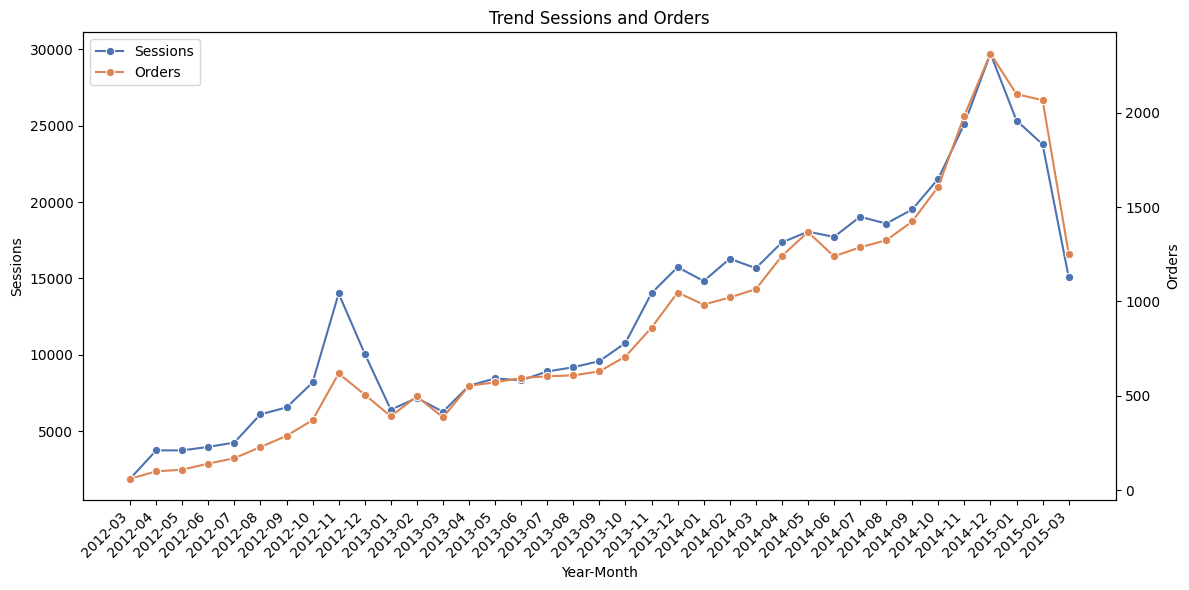

In [42]:
answer_1_2 = answer_1_2.sort_values(
    by=["year_month_date"]
).reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(
    x="year_month_date",
    y="sessions",
    data=answer_1_2,
    ax=ax1,
    label="Sessions",
    marker="o",
    color="#4C72B0"
)
ax1.set_ylabel("Sessions")
ax1.tick_params(axis="y")

ax2 = ax1.twinx()
sns.lineplot(
    x="year_month_date",
    y="orders",
    data=answer_1_2,
    ax=ax2,
    label="Orders",
    marker="o",
    color="#DD8452",
    legend=False
)
ax2.set_ylabel("Orders")
ax2.tick_params(axis="y")

ax1.set_xlabel("Year-Month")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

plt.title("Trend Sessions and Orders")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="upper left"
)

plt.tight_layout()
plt.show()

In [43]:
question_3 = """
SELECT *
FROM (
    SELECT
        ws.utm_source,
        ws.utm_content,
        COUNT(DISTINCT ws.website_session_id) AS total_session,
        COUNT(DISTINCT o.order_id) AS total_order
    FROM toy_store.website_sessions AS ws
    LEFT JOIN toy_store.orders AS o ON o.website_session_id = ws.website_session_id
    GROUP BY 1, 2
) t
ORDER BY
    CASE
        WHEN utm_source = 'gsearch' THEN 1
        WHEN utm_source = 'bsearch' THEN 2
        WHEN utm_source = 'socialbook' THEN 3
        WHEN utm_source = 'unknown' THEN 4
        ELSE 5
    END,
    CASE
        WHEN utm_content = 'g_ad_1' THEN 1
        WHEN utm_content = 'g_ad_2' THEN 2
        WHEN utm_content = 'b_ad_1' THEN 3
        WHEN utm_content = 'b_ad_2' THEN 4
        WHEN utm_content = 'social_ad_1' THEN 5
        WHEN utm_content = 'social_ad_2' THEN 6
        WHEN utm_content = 'unknown' THEN 7
        ELSE 8
    END;
"""

answer_3 = pd.read_sql(question_3, conn)
answer_3

,utm_source,utm_content,total_session,total_order
0,gsearch,g_ad_1,282706,18822
1,gsearch,g_ad_2,68531,5030
2,bsearch,b_ad_1,54909,3818
3,bsearch,b_ad_2,16123,1444
4,socialbook,social_ad_1,5095,55
5,socialbook,social_ad_2,5590,288
6,unknown,unknown,39917,2856


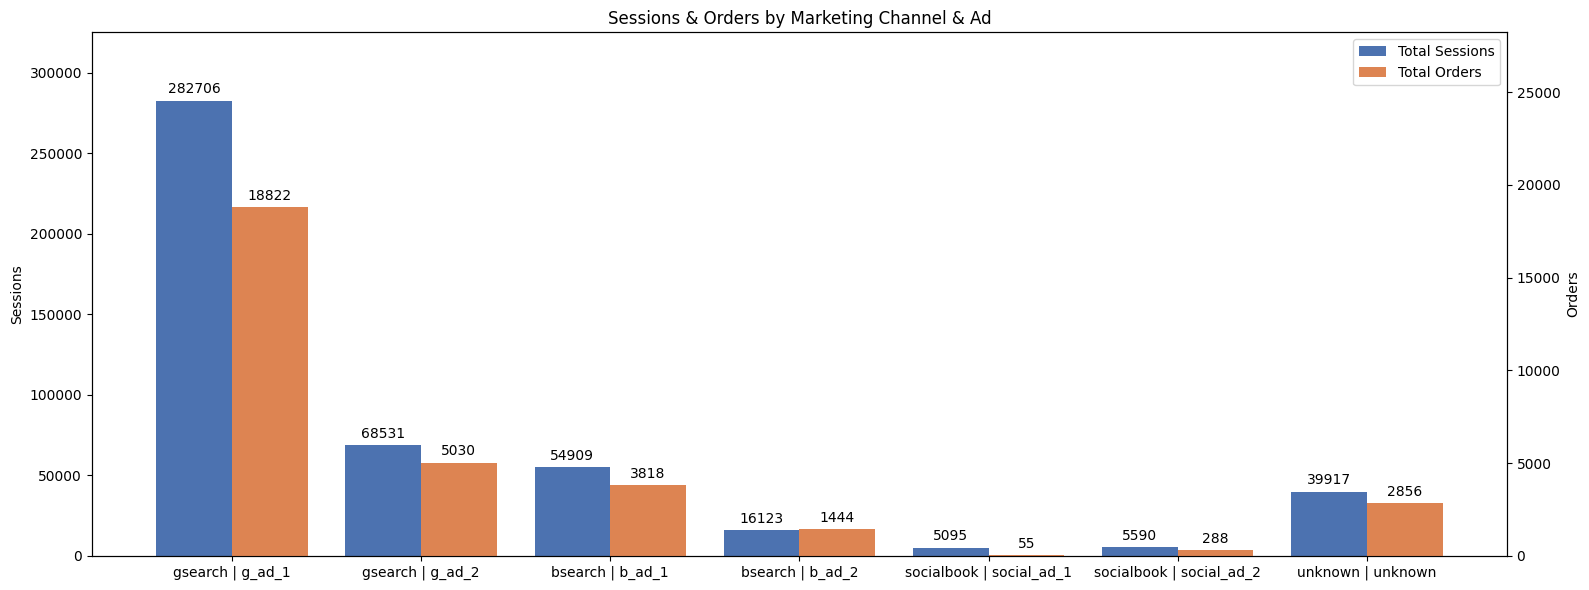

In [44]:
source_order = ["gsearch", "bsearch", "socialbook", "unknown"]

answer_3["utm_source"] = pd.Categorical(
    answer_3["utm_source"],
    categories=source_order,
    ordered=True
)

answer_3 = answer_3.sort_values(
    by=["utm_source", "utm_content"]
).reset_index(drop=True)

answer_3["channel_ad"] = (
    answer_3["utm_source"].astype(str)
    + " | "
    + answer_3["utm_content"]
)

x = np.arange(len(answer_3))
width = 0.4

fig, ax1 = plt.subplots(figsize=(16, 6))

bars1 = ax1.bar(
    x - width / 2,
    answer_3["total_session"],
    width,
    label="Sessions",
    color="#4C72B0"
)
ax1.set_ylabel("Sessions")
ax1.set_ylim(0, answer_3["total_session"].max() * 1.15)
ax1.bar_label(bars1, fmt="%.0f", padding=3)

ax2 = ax1.twinx()

bars2 = ax2.bar(
    x + width / 2,
    answer_3["total_order"],
    width,
    label="Orders",
    color="#DD8452"
)
ax2.set_ylabel("Orders")
ax2.set_ylim(0, answer_3["total_order"].max() * 1.5)
ax2.bar_label(bars2, fmt="%.0f", padding=3)

ax1.set_xticks(x)
ax1.set_xticklabels(
    answer_3["channel_ad"],
    rotation=0,
    ha="center"
)

plt.title("Sessions & Orders by Marketing Channel & Ad")
ax1.legend([bars1[0], bars2[0]], ["Total Sessions", "Total Orders"], loc="upper right")
plt.tight_layout()
plt.show()

In [45]:
question_4 = """
WITH base_data AS (
    SELECT
        DATE_FORMAT(ws.created_at, '%Y-%m') AS year_month_date,
        COUNT(DISTINCT ws.website_session_id) AS total_session,
        COUNT(DISTINCT o.order_id) AS total_order,
        SUM(o.price_usd) AS total_revenue,
        SUM(o.cogs_usd) AS total_cost,
        SUM(oir.refund_amount_usd) AS total_refunded,
        (SUM(o.price_usd) - SUM(o.cogs_usd) - SUM(oir.refund_amount_usd)) AS nett_revenue,
        ROUND((SUM(o.price_usd) - SUM(o.cogs_usd) - SUM(oir.refund_amount_usd)) / COUNT(DISTINCT ws.website_session_id), 2) AS nett_revenue_per_session,
        ROUND((SUM(o.price_usd) - SUM(o.cogs_usd) - SUM(oir.refund_amount_usd)) / COUNT(DISTINCT o.order_id), 2) AS nett_revenue_per_order
    FROM toy_store.website_sessions ws
    LEFT JOIN toy_store.orders o ON o.website_session_id = ws.website_session_id
    LEFT JOIN toy_store.order_item_refunds oir ON oir.order_id = o.order_id
    GROUP BY 1
),
lag_calc AS (
    SELECT
        *,
        LAG(nett_revenue_per_session) OVER (ORDER BY year_month_date) AS prev_sess,
        LAG(nett_revenue_per_order) OVER (ORDER BY year_month_date) AS prev_order
    FROM base_data
)
SELECT
    year_month_date,
    total_session,
    total_order,
    total_revenue,
    total_cost,
    total_refunded,
    nett_revenue,
    nett_revenue_per_session,
    nett_revenue_per_order,
    CASE
        WHEN prev_sess IS NULL THEN 'N/A'
        WHEN nett_revenue_per_session > prev_sess THEN 'UP'
        WHEN nett_revenue_per_session < prev_sess THEN 'DOWN'
        ELSE 'FLAT'
    END AS sess_trend,
    CASE
        WHEN prev_order IS NULL THEN 'N/A'
        WHEN nett_revenue_per_order > prev_order THEN 'UP'
        WHEN nett_revenue_per_order < prev_order THEN 'DOWN'
        ELSE 'FLAT'
    END AS order_trend
FROM lag_calc
ORDER BY year_month_date;
"""

answer_4 = pd.read_sql(question_4, conn)
answer_4

,year_month_date,total_session,total_order,total_revenue,total_cost,total_refunded,nett_revenue,nett_revenue_per_session,nett_revenue_per_order,sess_trend,order_trend
0,2012-03,1879,60,2999.40,1169.40,49.99,1780.01,0.95,29.67,N/A,N/A
1,2012-04,3734,99,4949.01,1929.51,249.95,2769.55,0.74,27.98,DOWN,DOWN
2,2012-05,3736,108,5398.92,2104.92,199.96,3094.04,0.83,28.65,UP,UP
3,2012-06,3963,140,6998.60,2728.60,399.92,3870.08,0.98,27.64,UP,DOWN
4,2012-07,4249,169,8448.31,3293.81,699.86,4454.64,1.05,26.36,UP,DOWN
5,2012-08,6097,228,11397.72,4443.72,849.83,6104.17,1.00,26.77,DOWN,UP
6,2012-09,6546,287,14347.13,5593.63,1299.74,7453.76,1.14,25.97,UP,DOWN
7,2012-10,8183,371,18546.29,7230.79,1349.73,9965.77,1.22,26.86,UP,UP
8,2012-11,14011,618,30893.82,12044.82,2299.54,16549.46,1.18,26.78,DOWN,DOWN
9,2012-12,10072,506,25294.94,9861.94,1499.70,13933.30,1.38,27.54,UP,UP


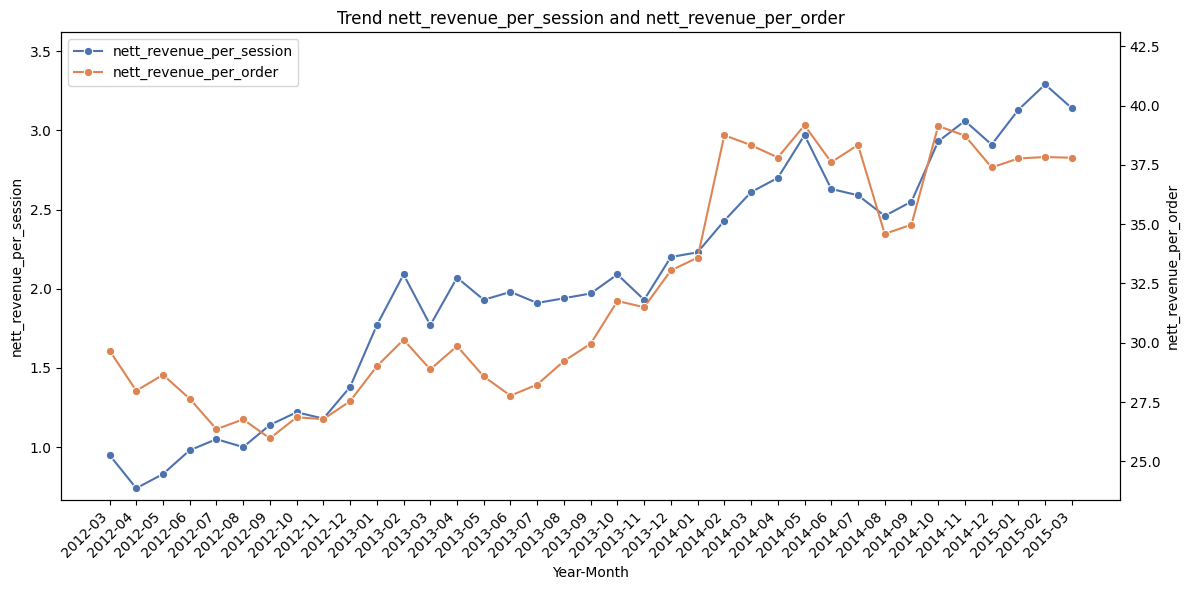

In [46]:
answer_4 = answer_4.sort_values(by=["year_month_date"]).reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(
    x="year_month_date",
    y="nett_revenue_per_session",
    data=answer_4,
    ax=ax1,
    label="nett_revenue_per_session",
    marker="o",
    color="#4C72B0"
)
ax1.set_ylabel("nett_revenue_per_session")
ax1.set_ylim(
    answer_4['nett_revenue_per_session'].min() * 0.9,
    answer_4['nett_revenue_per_session'].max() * 1.1
)
ax1.tick_params(axis="y")

ax2 = ax1.twinx()
sns.lineplot(
    x="year_month_date",
    y="nett_revenue_per_order",
    data=answer_4,
    ax=ax2,
    label="nett_revenue_per_order",
    marker="o",
    color="#DD8452",
    legend=False
)
ax2.set_ylabel("nett_revenue_per_order")
ax2.set_ylim(
    answer_4['nett_revenue_per_order'].min() * 0.9,
    answer_4['nett_revenue_per_order'].max() * 1.1
)
ax2.tick_params(axis="y")

ax1.set_xlabel("Year-Month")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

plt.title("Trend nett_revenue_per_session and nett_revenue_per_order")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="upper left"
)

plt.tight_layout()
plt.show()

In [47]:
user_segment = """
WITH segment_1 AS (
	SELECT
		user_id,
		COUNT(DISTINCT order_id) AS orders,
        SUM(price_usd) AS revenue,
		CASE
			WHEN COUNT(DISTINCT order_id) = 1 THEN 'new_user'
			WHEN COUNT(DISTINCT order_id) > 1 AND COUNT(DISTINCT DATE(created_at)) = 1 THEN 'new_user'
			WHEN COUNT(DISTINCT order_id) > 1 AND COUNT(DISTINCT DATE(created_at)) > 1 THEN 'repeat_user'
			ELSE 'unknown'
		END AS user_segment
	FROM toy_store.orders
	GROUP BY user_id
),
segment_2 AS (
    SELECT
        user_segment,
        CASE 
            WHEN orders = 1 THEN '1x order'
            WHEN orders = 2 THEN '2x orders'
            ELSE '3x orders'
        END AS order_segment,
        CASE 
            WHEN revenue < 100 THEN '<100 revenue'
            WHEN revenue BETWEEN 100 AND 199 THEN '100-199 revenue'
            ELSE '>200 revenue'
        END AS revenue_segment
    FROM segment_1
)
SELECT
    user_segment,
    order_segment,
    revenue_segment,
    COUNT(*) AS total_users
FROM segment_2
GROUP BY 1, 2, 3
ORDER BY
	CASE
        WHEN user_segment = 'new_user' THEN 1
        WHEN user_segment = 'repeat_user' THEN 2
    END,
    CASE
        WHEN order_segment = '1x order' THEN 1
        WHEN order_segment = '2x order' THEN 2
        WHEN order_segment = '3x order' THEN 3
    END;
"""

answer_user_segment = pd.read_sql(user_segment, conn)
answer_user_segment

,user_segment,order_segment,revenue_segment,total_users
0,new_user,1x order,<100 revenue,29964
1,new_user,1x order,100-199 revenue,1141
2,repeat_user,2x orders,<100 revenue,215
3,repeat_user,3x orders,100-199 revenue,19
4,repeat_user,2x orders,100-199 revenue,346
5,repeat_user,3x orders,>200 revenue,7
6,repeat_user,2x orders,>200 revenue,4


In [48]:
product_count = """
SELECT 
	p.product_id,
    p.product_name,
	COUNT(DISTINCT o.order_id) AS orders,
    COUNT(DISTINCT oir.order_id) AS order_refunds,
    ROUND(COUNT(DISTINCT oir.order_id) / COUNT(DISTINCT o.order_id), 2) AS order_refunds_pct,
    COUNT(DISTINCT o.order_id) - COUNT(DISTINCT oir.order_id) AS nett_orders,
    SUM(o.items_purchased) AS order_items,
    COUNT(DISTINCT oir.order_item_refund_id) AS order_item_refunds,
	ROUND(COUNT(DISTINCT oir.order_item_refund_id) / SUM(o.items_purchased), 2) AS order_item_refunds_pct,
    SUM(o.items_purchased) - COUNT(DISTINCT oir.order_item_refund_id) AS nett_order_items,
	SUM(o.price_usd) AS revenues,
    SUM(oir.refund_amount_usd) AS refund_amount,
    SUM(o.price_usd) - SUM(oir.refund_amount_usd) AS nett_revenues
FROM toy_store.orders AS o
LEFT JOIN toy_store.products AS p ON p.product_id = o.primary_product_id
LEFT JOIN toy_store.order_item_refunds AS oir ON oir.order_id = o.order_id
GROUP BY 1, 2
ORDER BY orders DESC, order_items DESC, revenues DESC;
"""

answer_product_count = pd.read_sql(product_count, conn)
answer_product_count

,product_id,product_name,orders,order_refunds,order_refunds_pct,nett_orders,order_items,order_item_refunds,order_item_refunds_pct,nett_order_items,revenues,refund_amount,nett_revenues
0,1,The Original Mr. Fuzzy,23861,1374,0.06,22487,29634.0,1382,0.05,28252.0,1420531.66,68106.18,1352425.48
1,2,The Forever Love Bear,4803,131,0.03,4672,5682.0,131,0.02,5551.0,318109.18,7396.69,310712.49
2,3,The Birthday Sugar Panda,3068,209,0.07,2859,4097.0,209,0.05,3888.0,180857.03,9533.91,171323.12
3,4,The Hudson River Mini bear,581,9,0.02,572,628.0,9,0.01,619.0,19775.72,301.91,19473.81


In [49]:
product_refund = """
WITH refund_order_level AS (
    SELECT
        oir.order_id,
        MIN(oir.created_at) AS first_refund_at
    FROM toy_store.order_item_refunds oir
    GROUP BY oir.order_id
),
refund_gap AS (
    SELECT
        o.order_id,
        o.primary_product_id,
        CASE
            WHEN DATEDIFF(rol.first_refund_at, o.created_at) BETWEEN 0 AND 6 THEN '<7 days'
            WHEN DATEDIFF(rol.first_refund_at, o.created_at) BETWEEN 7 AND 14 THEN '7-14 days'
            ELSE '>14 days'
        END AS refund_gap
    FROM toy_store.orders o
    JOIN refund_order_level rol ON rol.order_id = o.order_id
)
SELECT
    p.product_id,
    p.product_name,
    rg.refund_gap,
    COUNT(DISTINCT rg.order_id) AS refund_count
FROM refund_gap rg
JOIN toy_store.products p ON p.product_id = rg.primary_product_id
GROUP BY 1,2,3
ORDER BY
    CASE 
        WHEN refund_gap = '<7 days' THEN 1
        WHEN refund_gap = '7-14 days' THEN 2
        ELSE 3
    END,
    p.product_id, refund_count DESC;
"""

answer_product_refund = pd.read_sql(product_refund, conn)
answer_product_refund

,product_id,product_name,refund_gap,refund_count
0,1,The Original Mr. Fuzzy,<7 days,447
1,2,The Forever Love Bear,<7 days,32
2,3,The Birthday Sugar Panda,<7 days,67
3,4,The Hudson River Mini bear,<7 days,2
4,1,The Original Mr. Fuzzy,7-14 days,790
5,2,The Forever Love Bear,7-14 days,85
6,3,The Birthday Sugar Panda,7-14 days,122
7,4,The Hudson River Mini bear,7-14 days,7
8,1,The Original Mr. Fuzzy,>14 days,137
9,2,The Forever Love Bear,>14 days,14


In [50]:
product_trend = """
SELECT
	DATE_FORMAT(o.created_at, '%Y-%m') AS year_month_date,
    p.product_name,
    COUNT(DISTINCT o.order_id) AS orders
FROM toy_store.orders AS o
LEFT JOIN toy_store.products AS p ON p.product_id = o.primary_product_id
GROUP BY 1, 2
ORDER BY year_month_date;
"""

answer_product_trend = pd.read_sql(product_trend, conn)
answer_product_trend

,year_month_date,product_name,orders
0,2012-03,The Original Mr. Fuzzy,60
1,2012-04,The Original Mr. Fuzzy,99
2,2012-05,The Original Mr. Fuzzy,108
3,2012-06,The Original Mr. Fuzzy,140
4,2012-07,The Original Mr. Fuzzy,169
...,...,...,...
79,2015-02,The Original Mr. Fuzzy,1083
80,2015-03,The Birthday Sugar Panda,149
81,2015-03,The Forever Love Bear,173
82,2015-03,The Hudson River Mini bear,96


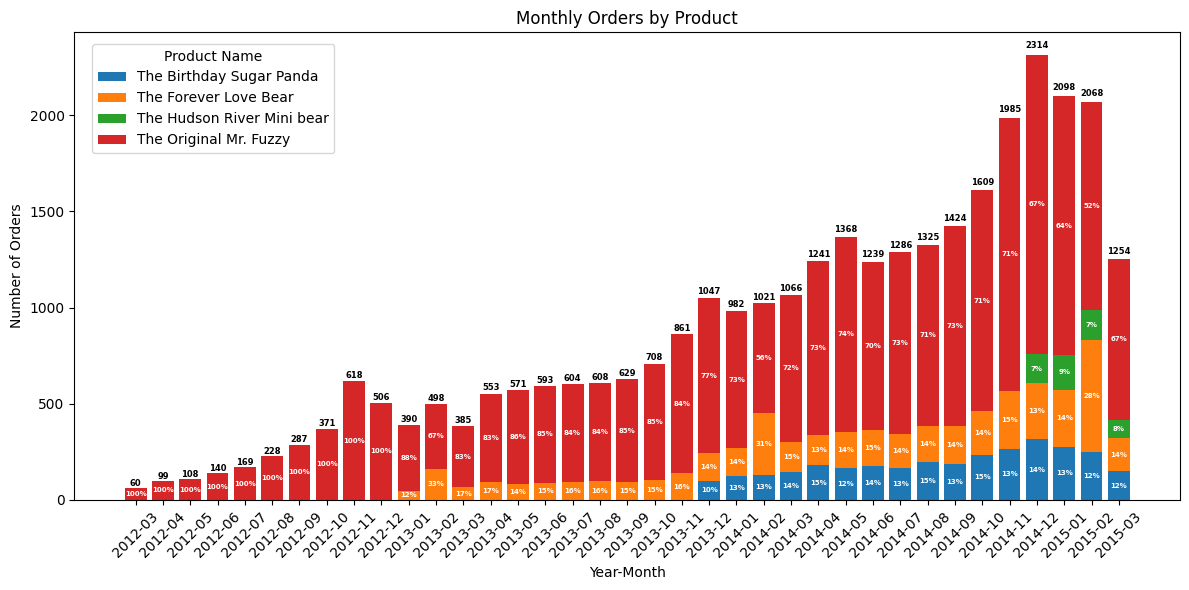

In [51]:
pivot_df = answer_product_trend.pivot_table(
    index='year_month_date',
    columns='product_name',
    values='orders',
    aggfunc='sum'
).fillna(0).sort_index()

total_per_month = pivot_df.sum(axis=1)
percent_df = pivot_df.div(total_per_month, axis=0) * 100

plt.figure(figsize=(12, 6))

colors = sns.color_palette("tab10", n_colors=len(pivot_df.columns))
bottom = pd.Series(0, index=pivot_df.index)

for i, product in enumerate(pivot_df.columns):
    plt.bar(
        pivot_df.index,
        pivot_df[product],
        bottom=bottom,
        color=colors[i],
        label=product
    )
    for x, y, b, pct in zip(
        pivot_df.index,
        pivot_df[product],
        bottom,
        percent_df[product]
    ):
        if y > 0 and pct >= 5:
            plt.text(
                x,
                b + y / 2,
                f"{pct:.0f}%",
                ha='center',
                va='center',
                fontsize=5,
                color='white',
                fontweight='bold'
            )
    bottom += pivot_df[product]

for x, total in zip(pivot_df.index, total_per_month):
    plt.text(
        x,
        total + total * 0.01,
        int(total),
        ha='center',
        va='bottom',
        fontsize=6,
        fontweight='bold'
    )
plt.legend(
    title='Product Name',
    loc='upper left',
    bbox_to_anchor=(0.01, 0.99),
    frameon=True
)

plt.title('Monthly Orders by Product')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
conn.close()